In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [157]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]

In [158]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1_DEV.db')
copy_array = copy.deepcopy(spec_array)

ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
167 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1994d sn1994d-19940316.flm bsnip 203.909156574 -5.57452762216 49427.0 0.002058 8.0 3286.0 7214.0
1994d sn1994d-19940317.flm bsnip 279.037585961 -4.11852407745 49428.459 0.002058 8.0 3166.0 9828.0
1995ac sn1995ac-19950926-uoi.flm bsnip 17.8188722918 -5.84826509087 49986.406 0.050055 10.0 3100.0 9900.0
1997br sn1997br-19970416-uoi.flm bsnip 171.323706415 -4.41866036556 50554.43 0.005961 16.0 3194.0 10356.0
1997do sn1997do-19971108-uoi.flm bsnip 151.720977432 -5.80525086128 50760.48 0.01012 13.0 3290.0 10344.0
1998dm sn1998dm-19980831-ui-corrected.flm bsnip 266.825445075 -4.86520587957 51056.423 0.006535 14.0 3332.0 10082.0
2000cx sn2000cx-20000723-nickel.flm bsnip 135.892783166 -4.85566908045 51748.0 0.0081 None 3854.0 7290.0
2001ba sn2001ba-

2007le sn2007le-20071019.21-fast.flm cfa 161.212550483 -5.66194606053 54392.21 0.006721 14.0 3504.0 7316.0
2007s sn2007S-20070208.34-fast.flm cfa 94.71312158 -4.4688825328 54139.34 0.0139 None 3482.0 7262.0
2008ar sn2008ar-20080304.40-fast.flm cfa 45.8794580246 -4.58024045288 54529.4 0.026147 11.0 3442.0 7180.0
2008z sn2008Z-20080213.33-fast.flm cfa 85.3215818845 -5.25960097552 54509.33 0.02099 None 3458.0 7216.0
2008z sn2008Z-20080214.34-fast.flm cfa 63.2792293914 -4.27036503786 54510.34 0.02099 None 3458.0 7216.0
2004ef SN04ef_040910_b01_CLA_BC.dat csp 34.9582705912 -5.22801010668 53258.18 0.030985 12.0 3932.0 6850.0
2005el SN05el_050927_b01_DUP_WF.dat csp 120.451163923 -5.73055738947 53640.34 0.01491 8.0 3798.0 9048.0
2005eq SN05eq_051005_b01_DUP_WF.dat csp 34.148893303 -5.69303298319 53648.31 0.028977 15.0 3746.0 8924.0
2005ki SN05ki_051125_b01_DUP_MS.dat csp 72.642085744 -5.9330440236 53699.32 0.019207 8.0 3762.0 7102.0
2006d SN06D_060116_b01_NTT_EM.dat csp 152.362847109 -5.133848

In [160]:
print spec_array[0].event_data.keys()

[u'e_mb_lc', u'salt2_phot_source', u'e_c_salt', u'logMst_lc', u'Foundation_vel', u'delta', u'cov_mb_s_lc', u'B_minus_V_cfa_err', u'NED_host', u'e_Bmag_salt', u'mu_mlcs31', u'glon_host', u'zCMB_mlcs31', u'Carbon_presence', u'e_av_mlcs31', u'e_logMst_lc', u'e_s_salt', u'av_mlcs17', u'RA', u'Dm15_from_fits', u'cov_s_c_lc', u'MJD_max', u'M_b_cfa_err', u'e_delta_mlcs17', u'cERR', u'Foundation_x1', u'e_c_lc', u'Av_25', u'Redshift', u'av_mlcs31', u't0', u'Bmag_salt2', u'czCMB_host', u'x1ERR', u'mtype_host', u'filt_host', u'x1_salt2', u'cz_host', u'mu_salt', u'Ebv_host', u'mb_lc', u'globalmass', u'MUMODEL', u'zCMB_mlcs17', u'DEC', u'Homogenized_Photometry', u'e_c_salt2', u'e_av_mlcs17', u'Foundation_z', u'MURES_NO_MSTEP_C', u'Foundation_c', u'delta_mlcs17', u'bias_lc', u'global_umg', u'localmass', u'e_delta_mlcs31', u'MURES_NO_MSTEP', u'e_zCMB_mlcs31', u'zCMB_salt2', u'separation', u'V_at_max', u'c', u'Bmag_salt', u't1_host', u'Foundation_mjd_max', u'MU', u'ypos_host', u'localssfr', u'glat_hos

In [6]:
spec_array_dered = kpora.host_dereddening(spec_array, verbose=False, cutoff=2.)

In [32]:
for spec in spec_array_dered:
    print spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2]

1994s sn1994s-19940616-uoi.flm bsnip 0.998840596273 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip -0.728371655089 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 0.496750833938 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 0.460351148368 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip -0.385339276873 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 0.496974506501 3328.0 10316.0
2001cp sn2001cp-20010629-ui.flm bsnip 0.917447344588 3280.0 10122.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip -0.16048772706 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip -0.0433753943234 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 0.0575854705037 3050.0 9148.0
2005ag sn2005ag-20050212.596-br.flm bsnip -0.670578373849 3554.0 8516.0
2005eq sn2005eq-20051011.376-ui-corrected.flm bsnip 0.202142516304 3280.0 10154.0
2005lz sn2005lz-20060101.381-deimos.flm bsnip 0.451002115207 4774.0 9582.0
2005na sn2005na-20060105.335-ui.flm bsnip 0.

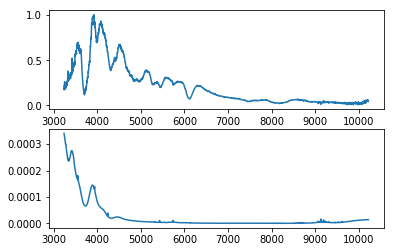

In [8]:
fig, ax = plt.subplots(2,1)
example_spec = spec_array_dered[20]
ax[0].plot(example_spec.wavelength, example_spec.flux)
ax[1].plot(example_spec.wavelength, 1/example_spec.ivar)
plt.show()

In [9]:
spec_attributes = dir(spec_array[0])
print len(spec_array)
for att in spec_attributes:
    print att

170
SNR
__class__
__delattr__
__dict__
__doc__
__format__
__getattribute__
__hash__
__init__
__module__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


In [154]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '../data/kaepora_v1_DEV.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr = True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
4 flagged spectra removed 163 spectra left
5 spectra of peculiar Ias removed 158 spectra left
133 spectra of SNe that have host reddening corrections
Arrays cleaned
133 spectra may have telluric contamination
75 total SNe
removed spectra of SNe with A_V > 2.0
Using 129 spectra of 72 SNe
Gini balancing...
Balanced after 20 iterations


In [140]:
# plt.figure(figsize = [15,8])
# for b in boot_sn_arrays[0]:
#     plt.plot(b.wavelength, b.flux, 'g')
# plt.plot(composites[0].wavelength, composites[0].flux, 'k')
# plt.show()

Phase:  -5.094427357114232
dm15:  1.1156625902206807
Redshift:  0.01582468204491898
HR:  1.1368542185384298


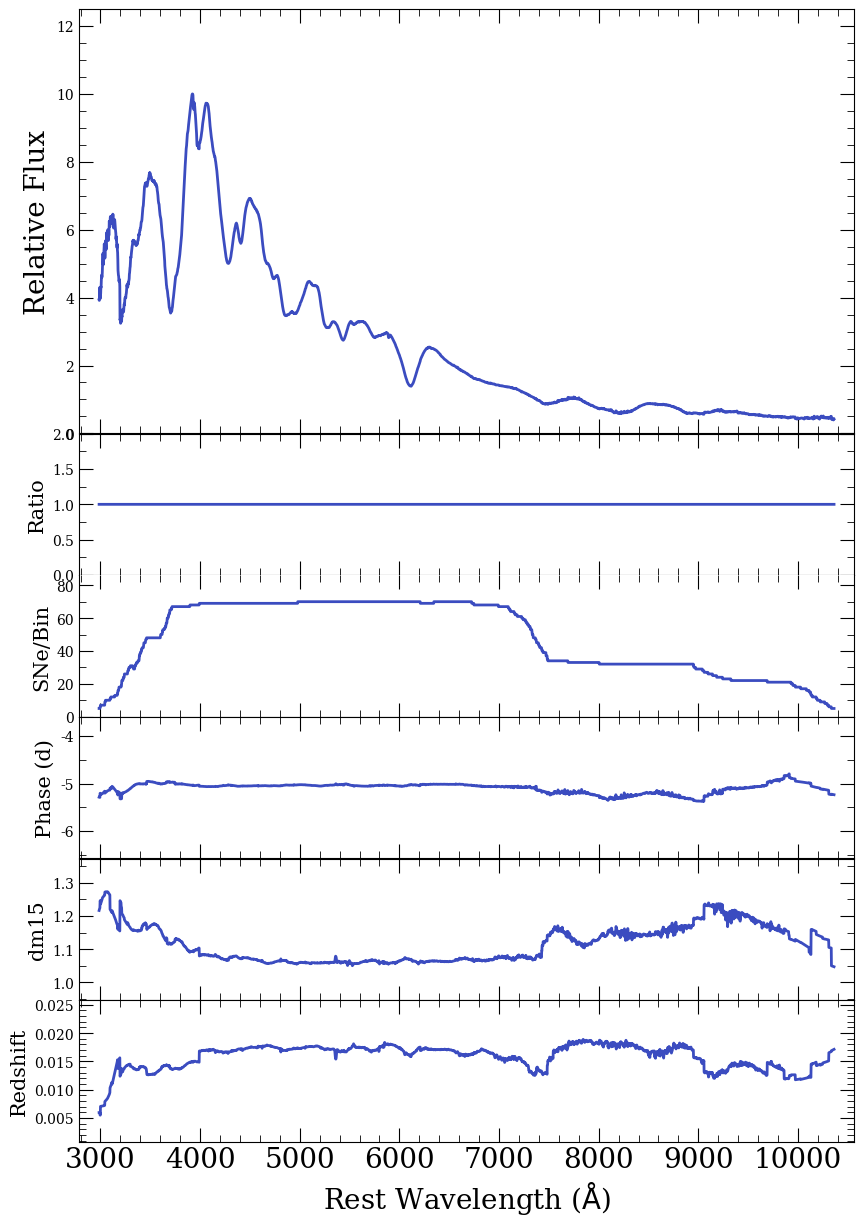

In [156]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

1992a


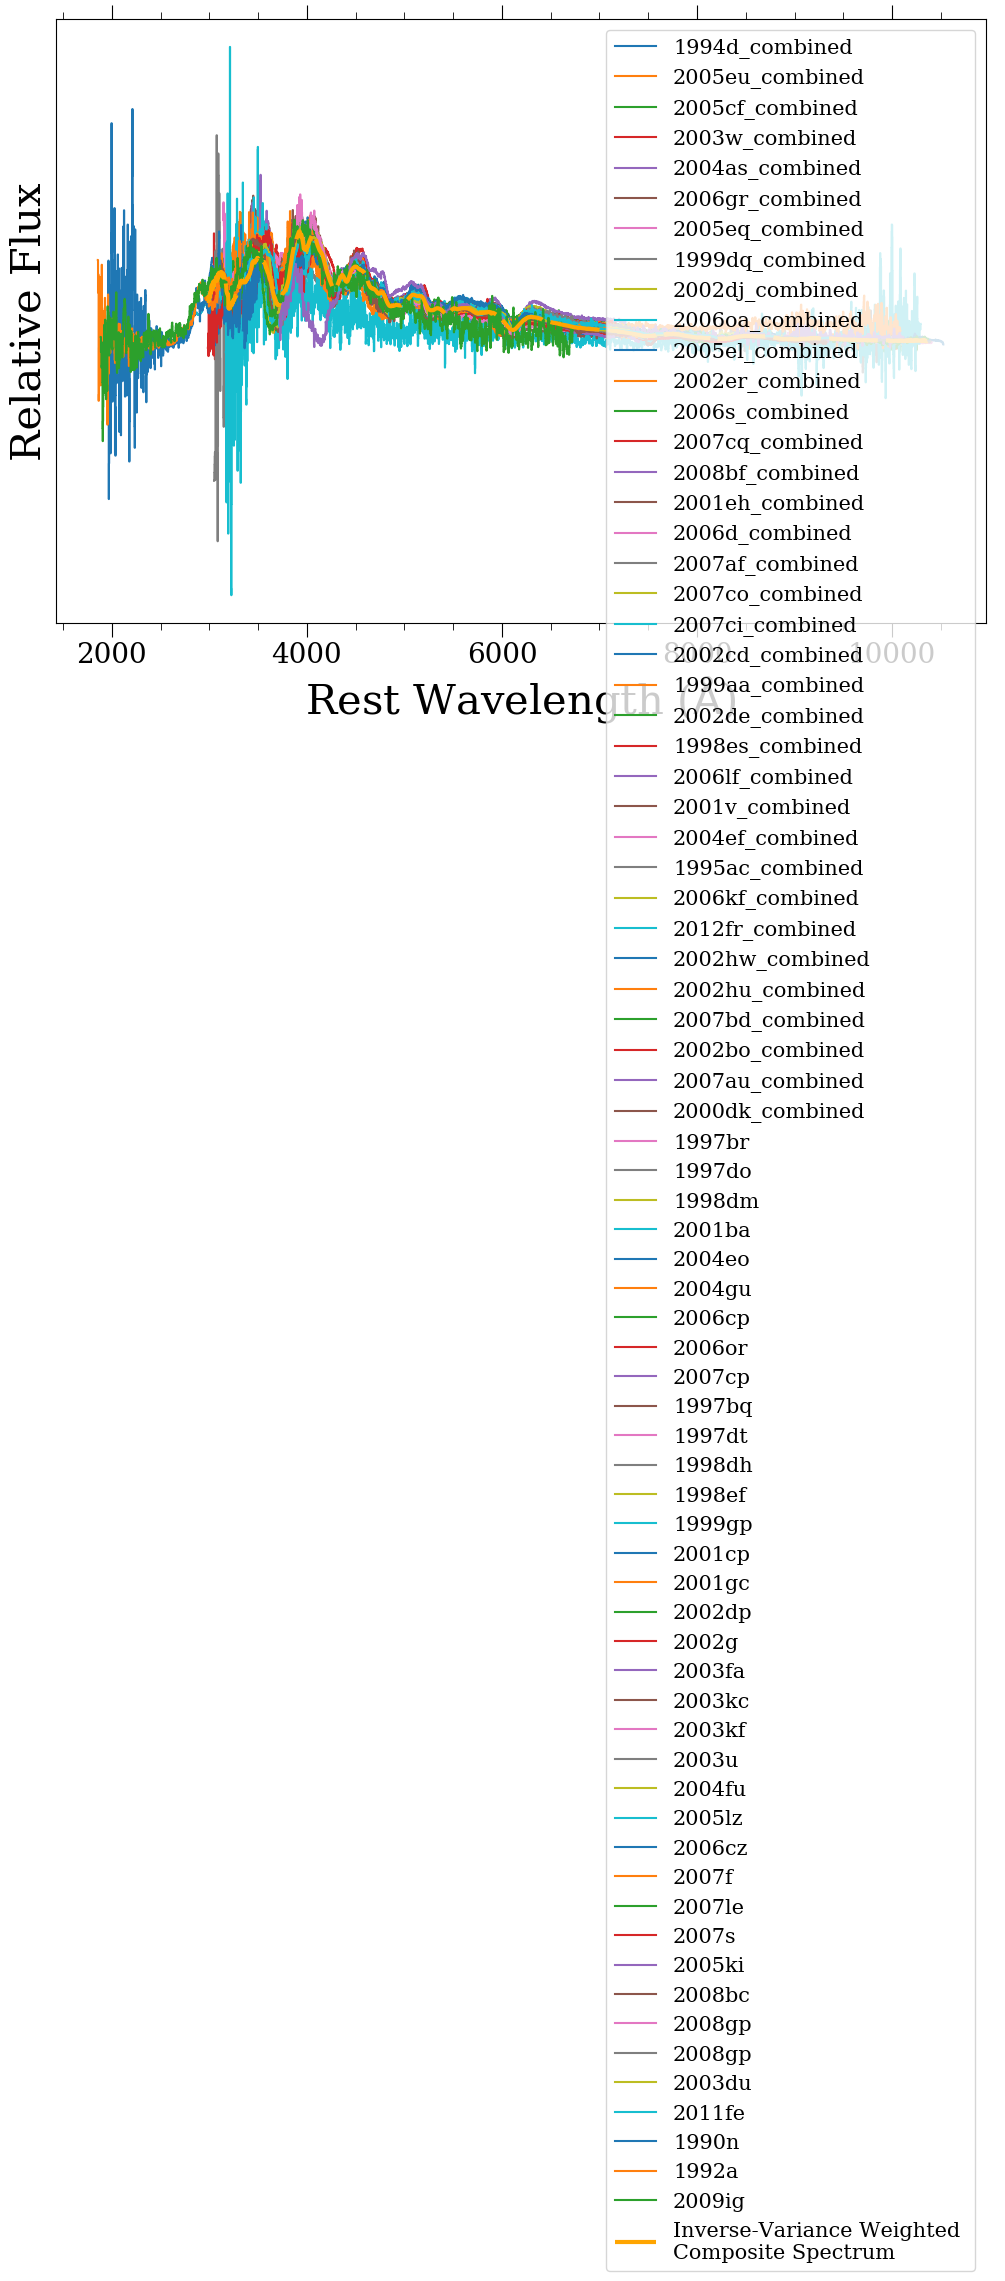

In [161]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)

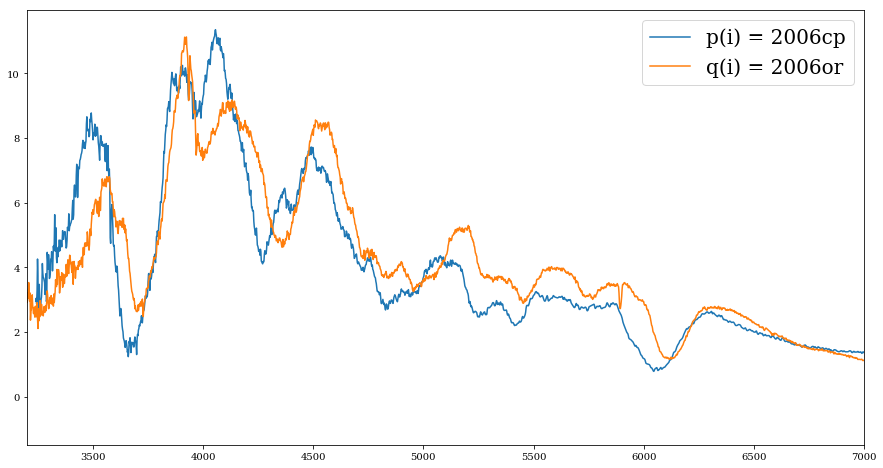

In [167]:
names = ['p(i)', 'q(i)']
i=0
plt.figure(figsize=[15,8])
for sn in sn_arrays[0]:
    if sn.name == '2006cp' or sn.name == '2006or':
        
        plt.plot(sn.wavelength, sn.flux, label = names[i] + ' = '+ sn.name)
        plt.legend(fontsize=20)
        plt.xlim(3200, 7000)
        i+=1
plt.show()